<a href="https://colab.research.google.com/github/Jojohickman21/First-Time-Machine-learning/blob/master/Chihuahua_Versus_MaltiPoo_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#Downloading FastAI Library

!pip install -Uqq  duckduckgo_search
!pip3 install git+https://github.com/fastai/fastai.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-9i4a_yvt
  Running command git clone --filter=blob:none --quiet https://github.com/fastai/fastai.git /tmp/pip-req-build-9i4a_yvt
  Resolved https://github.com/fastai/fastai.git to commit dedec6be9334b1c3abfcdc9a70fe43898a74e39e
  Preparing metadata (setup.py) ... done


In [77]:
#Importing Dependencies 

from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastai.data.all import *
from fastai.vision.all import *
from fastcore.all import *
from fastai import *
from pathlib import Path

In [78]:
#Defining Images search function, returns array of url's of images from DuckDuckGo
def search_images(search,max_images=30):
  return L(ddg_images(keywords = search, max_results=max_images)).itemgot('image')

search_images("Maltese Poodle Mix")

(#30) ['https://thehappypuppysite.com/wp-content/uploads/2017/11/maltipoo3.jpg','http://www.iheartteacups.com/wp-content/uploads/2015/10/IMG_0722.jpg','http://3.bp.blogspot.com/-6bUN0i2DsF8/T8LfeqXqVJI/AAAAAAAAF5o/BsEvIFUGAfw/s1600/Maltese_mix_IMG_6555blog.jpg','https://3.bp.blogspot.com/-xz9Kfr3T5qU/XHS2muCgmXI/AAAAAAAA68M/Vbo2qt3Ov-Uh-BtoTfr32JeU85WjijqaACLcBGAs/s1600/snowflake2.jpg','https://thehappypuppysite.com/wp-content/uploads/2017/11/maltipoo2.jpg','https://www.allthingsdogs.com/wp-content/uploads/2019/04/maltese-poodle-mix-portrait.jpg','https://i.pinimg.com/736x/7b/d5/3f/7bd53fd67d386a77a870d9374575291d--maltese-poodle-poodle-mix.jpg','https://1.bp.blogspot.com/-VJxbX2a5JfE/T8Lfd1Ec3dI/AAAAAAAAF5g/6Tg1OqBE9wM/s1600/Maltese_mix_IMG_6514.jpg','https://michelinespups.com/wp-content/uploads/2017/05/Maltipoo-ocala-florida-micheline-pups5-1024x768.jpg','https://3.bp.blogspot.com/-3FcOsaJsBA4/XHS2VeVT1vI/AAAAAAAA678/0vajMhThJ_wN5wSzactS4d0n6KJwZQ8ggCLcBGAs/s1600/snowflake.jpg'...]

In [79]:
from ctypes import resize

#Defines the subesequent categories we will search through
searches = 'Maltese Poodle Mix', 'chihuahua'
path = Path('Maltese_or_Poodle')
import time 

#Loops through categories with slight variations in searches
for o in searches:
  dest = path/o
  dest.mkdir(parents = True, exist_ok = True)
  download_images(dest,urls=search_images(o),max_pics=30)
  time.sleep(1)
  download_images(dest,urls=search_images(f"bathed {o}"),max_pics=30)
  time.sleep(1)
  download_images(dest,urls=search_images(f"sad {o}"),max_pics=30)
  resize_images(path/o, dest = path/o , max_size = 400)




In [80]:
#Removes failed Search images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#1) [None]

In [81]:
#Creates Datablock that defines data features
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

In [82]:
#Imports Resnet34 model
learner = vision_learner(dls,resnet34,metrics=error_rate)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [83]:
#Transfer Learns the model on the CHI-Poodle dataset I made
learner.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.763635,0.309631,0.098765,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.363815,0.370819,0.086420,00:11
1,0.386963,0.467601,0.148148,00:11
2,0.399942,0.286182,0.078189,00:10
3,0.328751,0.212715,0.061728,00:11
4,0.246274,0.204658,0.053498,00:11


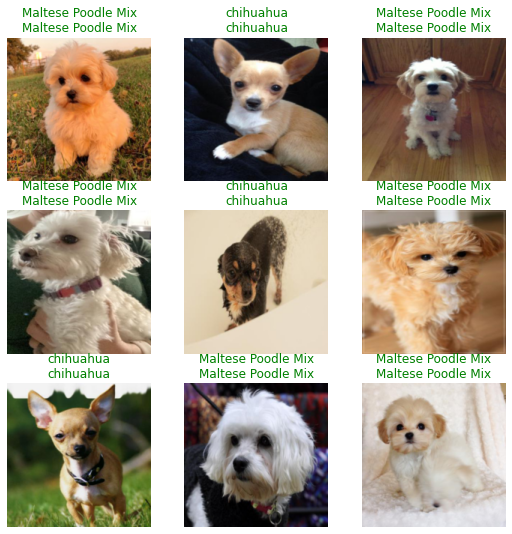

In [84]:
#Shows Model Results
learner.show_results()

This is a Chihuahua, predicted by Resnet34 with a 0.644212007522583 probability!


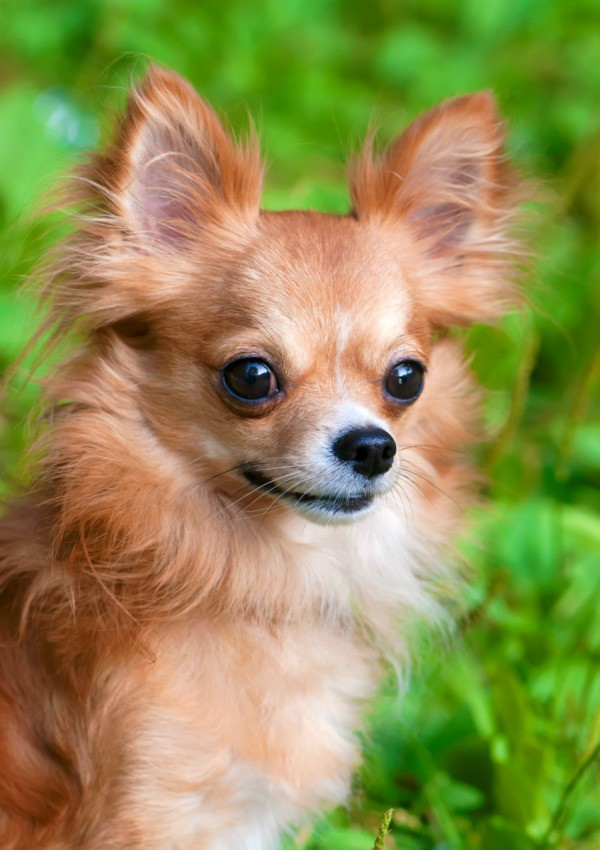

In [86]:
#Runs prediction on test examples to see accuracy
testimg = search_images("long hair chihuahua")[0]
download_url(url=testimg, dest = 'chiq.jpg')


is_cha, looss, is_cha2 = learner.predict(PILImage.create('chiq.jpg'))

print(f"This is a {is_cha}, predicted by Resnet34 with a {is_cha2[0]} probability!")

Image.open('chiq.jpg')

This is a Maltese Poodle Mix, predicted by Resnet34 with a 0.9999997615814209 probability!


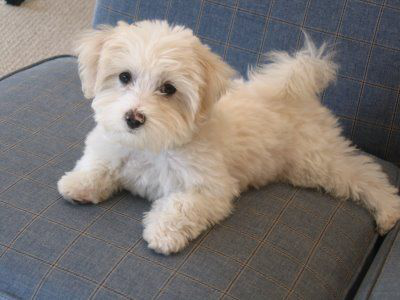

In [91]:
#Runs prediction on test examples to observe accuracy
testimg2 = search_images("Maltese poodle mix adult")[0]
download_url(url = testimg2, dest = 'Pood.jpg')

is_cha, looss, is_cha2 = learner.predict(PILImage.create('Pood.jpg'))

print(f"This is a {is_cha}, predicted by Resnet34 with a {is_cha2[1]} probability!")
Image.open('Pood.jpg')

('Maltese Poodle Mix',
 TensorBase(1),
 TensorBase([1.8476e-07, 1.0000e+00, 6.2796e-10]))